VARIABLE DEFINITION

In [ ]:

import pandas as pd

df_var_def = pd.read_csv('Variable_Definitions.csv')

print(df_var_def.head())
print(df_var_def.info())

          Variable defination
0                         age
1                         sex
2  chest pain type (4 values)
3      resting blood pressure
4  serum cholestoral in mg/dl
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Variable defination  13 non-null     object
dtypes: object(1)
memory usage: 232.0+ bytes
None


In [ ]:
print(df_var_def.columns)

Index(['Variable defination'], dtype='object')


TEST DATASET

In [ ]:

import pandas as pd


df_test = pd.read_csv('Test Dataset.csv')


print(df_test.head())
print(df_test.info())

      id  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16501   70    1   0       163   495    0        2      170      1      2.0   
1  10444   61    1   0       131   238    0        2       74      1      4.9   
2  14288   53    1   0        95   558    1        1       73      1      0.7   
3  10409   37    0   1       178   287    0        1      192      1      5.7   
4  17330   35    0   3       104   281    0        0      122      0      1.3   

   slope  ca  thal  
0      1   0     1  
1      2   2     2  
2      1   1     0  
3      1   0     0  
4      1   4     3  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2697 entries, 0 to 2696
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2697 non-null   int64  
 1   age       2697 non-null   int64  
 2   sex       2697 non-null   int64  
 3   cp        2697 non-null   int64  
 4   trestbps  2697 non-null   int64  
 5   ch

In [ ]:
print(df_test.shape)

(2697, 14)


In [ ]:
print(df_test.describe())

                 id          age          sex           cp     trestbps  \
count   2697.000000  2697.000000  2697.000000  2697.000000  2697.000000   
mean   14939.832036    53.064516     0.488691     1.504264   146.384872   
std     2888.940621    14.350978     0.499965     1.112747    30.640580   
min    10000.000000    29.000000     0.000000     0.000000    94.000000   
25%    12455.000000    41.000000     0.000000     1.000000   121.000000   
50%    14854.000000    53.000000     0.000000     1.000000   147.000000   
75%    17465.000000    66.000000     1.000000     3.000000   172.000000   
max    19999.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  2697.000000  2697.000000  2697.000000  2697.000000  2697.000000   
mean    344.027809     0.497219     1.021135   135.993326     0.484613   
std     127.265038     0.500085     0.811590    38.419913     0.499856   
min     126.000000     0.000

In [ ]:
print(df_test.nunique())

id          2697
age           49
sex            2
cp             4
trestbps     107
chol         437
fbs            2
restecg        3
thalach      132
exang          2
oldpeak       63
slope          3
ca             5
thal           4
dtype: int64


In [ ]:
df_test.cleaned = df_test.fillna(df_test.mean())

In [ ]:
df_test.cleaned = df_test.cleaned.astype('int')

In [ ]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaler.fit(df_test.cleaned)


df_test_scaler = scaler.transform(df_test.cleaned)

In [ ]:
df_test_encoded = pd.get_dummies(df_test.cleaned, drop_first = True)

In [ ]:

df_test_encoded = df_test_encoded[X_train.columns]

In [ ]:

from sklearn.model_selection import train_test_split


X = df_test.drop(columns=['exang'])
y = df_test['exang']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


y_pred_test = model.predict(df_test_encoded)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_test = model.predict(df_test_encoded)

In [ ]:

submission = pd.DataFrame({
    'id': df_test['id'],  # Assuming there's an ID column
    'Prediction': y_pred_test
})


submission.to_csv('submission.csv', index=False)

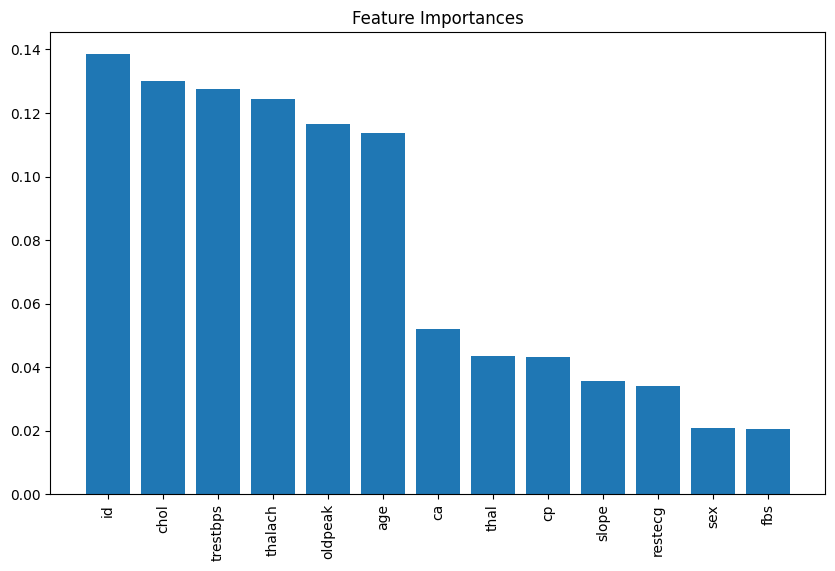

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

TRAIN DATASET

In [ ]:
import pandas as pd


df_train = pd.read_csv(
'/Train Dataset  (1).csv')

print(df_train.head())
print(df_train.info())

      Id  Age  Sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  16167   33    0   1       158   205    1        0      154      0      1.5   
1  11275   53    1   2       198   154    0        1      104      0      0.8   
2  13251   37    1   2       101   202    1        0      155      0      2.1   
3  19921   75    0   0       113   306    1        2       88      1      4.9   
4  11293   35    1   2       139   419    1        1      166      1      0.9   

   slope  ca  thal  target  
0      1   4     1       1  
1      2   1     0       0  
2      1   3     1       1  
3      0   2     2       1  
4      2   4     0       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64 

In [ ]:
print(df_train.shape)

(7303, 15)


In [ ]:
print(df_train.describe())

                 Id          Age          Sex           cp     trestbps  \
count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
std     2886.026080    14.185970     0.500034     1.115594    31.099538   
min    10001.000000    29.000000     0.000000     0.000000    94.000000   
25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
max    19998.000000    77.000000     1.000000     3.000000   200.000000   

              chol          fbs      restecg      thalach        exang  \
count  7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
mean    342.805970     0.493085     1.013008   136.506093     0.503218   
std     127.291998     0.499986     0.815806    38.141966     0.500024   
min     126.000000     0.000

In [ ]:
print(df_train.nunique())

Id          7303
Age           49
Sex            2
cp             4
trestbps     107
chol         439
fbs            2
restecg        3
thalach      132
exang          2
oldpeak       63
slope          3
ca             5
thal           4
target         2
dtype: int64


In [ ]:
df_cleaned = df_train.dropna()

In [ ]:
df_cleaned = df_train.fillna(df_train.mean())

In [ ]:
df_cleaned = df_cleaned.astype('int')

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, drop_first =True)

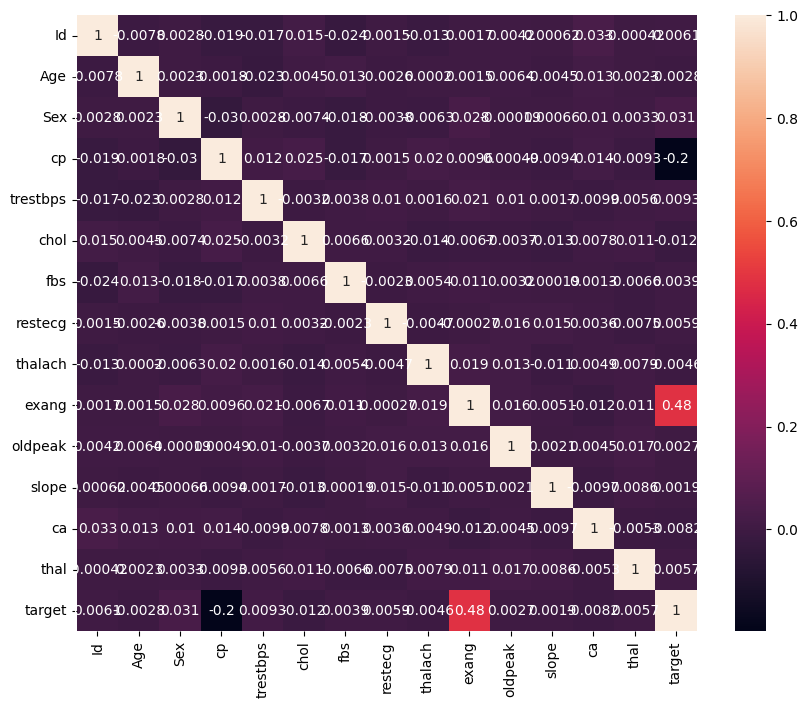

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(df_encoded.corr(),annot =True)
plt.show()

In [ ]:
sns.pairplot(df_encoded)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.model_selection import train_test_split

x= df_encoded.drop('exang', axis =1)
y = df_encoded['exang']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state =42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6721423682409309
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.48      0.59       706
           1       0.64      0.85      0.73       755

    accuracy                           0.67      1461
   macro avg       0.69      0.67      0.66      1461
weighted avg       0.69      0.67      0.66      1461



In [99]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

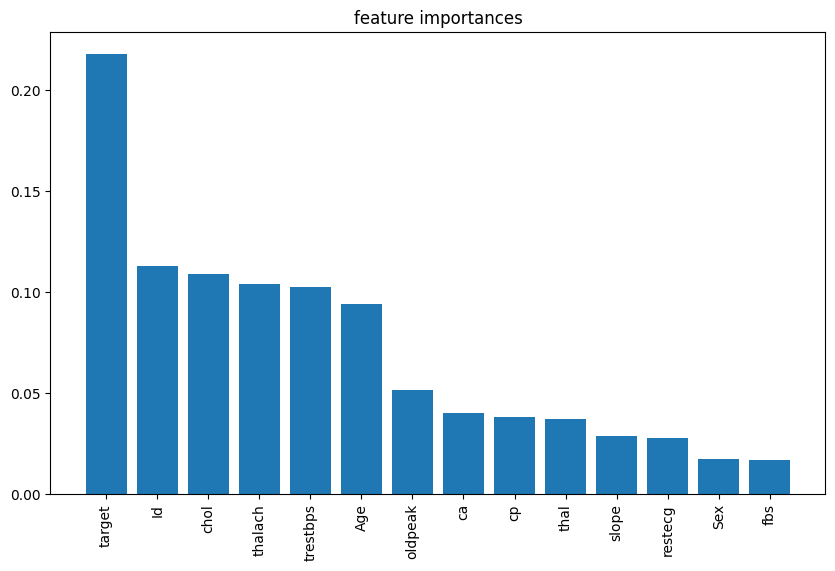

In [102]:
plt.figure(figsize = (10,6))
plt.title('feature importances')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align = 'center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation = 90)
plt.show()